# Visualizing some outputs from DeepSort

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from IPython.display import display, clear_output, HTML
import time
import glob

In [2]:
CSV_PATH = "../tracks_deepsort.csv"
LOCAL_CROPS_DIR = "../back_lights_on_images/"
# LOCAL_CROPS_DIR = "../sampled_images/"

In [3]:
# Load the CSV
df = pd.read_csv(CSV_PATH)
df["frame_id_int"] = df["frame_id"].astype(int)
df = df.sort_values(["sequence", "track_id", "frame_id_int"])

In [4]:
# Add a column for local file paths (just the filename)
df["local_path"] = df["crop_path"].apply(lambda x: os.path.join(LOCAL_CROPS_DIR, x.lstrip("./")))

In [5]:
# Check which files actually exist locally
df["exists_locally"] = df["local_path"].apply(os.path.exists)

print(f"Total rows in CSV: {len(df)}")
print(f"Files available locally: {df['exists_locally'].sum()}")
# print(f"Files in {LOCAL_CROPS_DIR}: {len(glob.glob(os.path.join(LOCAL_CROPS_DIR, '*.jpg')))}")

Total rows in CSV: 1067996
Files available locally: 8574


In [6]:
# Get tracks that have local images
local_tracks = df[df["exists_locally"]].groupby(["sequence", "track_id"]).size()
local_tracks = local_tracks[local_tracks >= 3].sort_values(ascending=False)  # At least 3 frames

print(f"\nTracks with local images (3+ frames):")
for (seq, tid), count in local_tracks.head(10).items():
    print(f"  Sequence: {seq}, Track ID: {tid}, Frames: {count}")


Tracks with local images (3+ frames):
  Sequence: 2024-07-10-13-11-35_mapping_tartu_streets/camera_narrow_front, Track ID: 405, Frames: 46
  Sequence: 2024-08-16-16-03-30_mapping_tartu_streets/camera_narrow_front, Track ID: 2, Frames: 44
  Sequence: 2024-08-22-10-38-05_mapping_tartu_streets_bus_stops/camera_narrow_front, Track ID: 1, Frames: 42
  Sequence: 2024-09-05-14-18-54_mapping_tartu_streets_traffic_lights_ouster_lidar_2/camera_wide_front, Track ID: 1005, Frames: 37
  Sequence: 2024-09-05-13-41-48_mapping_tartu_streets_traffic_lights_ouster_lidar/camera_narrow_front, Track ID: 1184, Frames: 36
  Sequence: 2024-04-12-16-02-09_mapping_tartu_streets/camera_fl, Track ID: 453, Frames: 35
  Sequence: 2024-07-10-13-11-35_mapping_tartu_streets/camera_wide_front, Track ID: 412, Frames: 33
  Sequence: 2024-07-11-15-51-59_mapping_tartu_streets/camera_wide_front, Track ID: 1079, Frames: 32
  Sequence: 2024-07-11-15-51-59_mapping_tartu_streets/camera_narrow_front, Track ID: 606, Frames: 30
 

In [7]:
df.head(20)

,sequence,track_id,frame_id,class_id,score,x1,y1,x2,y2,crop_path,img_path,width,height,frame_id_int,local_path,exists_locally
0,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,2,2,0.904591,1138,1244,1450,1516,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,2,../back_lights_on_images/gpfs/space/projects/m...,False
1,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,3,2,0.903356,1138,1244,1450,1515,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,3,../back_lights_on_images/gpfs/space/projects/m...,False
2,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,4,2,0.908380,1138,1244,1450,1516,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,4,../back_lights_on_images/gpfs/space/projects/m...,False
3,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,5,2,0.907899,1138,1244,1450,1516,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,5,../back_lights_on_images/gpfs/space/projects/m...,False
4,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,6,2,0.904007,1137,1243,1450,1516,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,6,../back_lights_on_images/gpfs/space/projects/m...,False
5,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,7,2,0.902140,1138,1243,1450,1515,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,7,../back_lights_on_images/gpfs/space/projects/m...,False
6,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,8,2,0.905871,1137,1243,1450,1515,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,8,../back_lights_on_images/gpfs/space/projects/m...,False
7,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,9,2,0.902959,1138,1243,1451,1516,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,9,../back_lights_on_images/gpfs/space/projects/m...,False
8,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,10,2,0.904933,1138,1243,1450,1516,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,10,../back_lights_on_images/gpfs/space/projects/m...,False
9,2024-03-25-15-40-16_mapping_tartu/camera_fl,1,11,2,0.903851,1138,1244,1450,1516,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,/gpfs/space/projects/ml2024/2024-03-25-15-40-1...,2064,1544,11,../back_lights_on_images/gpfs/space/projects/m...,False


In [8]:
def show_track_grid(sequence, track_id, max_frames=20, cols=5, figsize=None, show_diagnostics=True):
    track_df = df[(df["sequence"] == sequence) & 
                  (df["track_id"] == track_id) & 
                  (df["exists_locally"])].copy()
    track_df = track_df.sort_values("frame_id_int").head(max_frames)
    
    if len(track_df) == 0:
        print(f"No local images found for sequence={sequence}, track_id={track_id}")
        return
    
    n_frames = len(track_df)
    rows = (n_frames + cols - 1) // cols
    
    if figsize is None:
        figsize = (cols * 3, rows * 3.5)
    
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    # Handle single row/column cases
    if rows == 1 and cols == 1:
        axes = [[axes]]
    elif rows == 1:
        axes = [axes]
    elif cols == 1:
        axes = [[ax] for ax in axes]
    
    for idx, (_, row) in enumerate(track_df.iterrows()):
        r = idx // cols
        c = idx % cols
        ax = axes[r][c]
        
        img = Image.open(row["local_path"])
        crop_w, crop_h = img.size
        ax.imshow(img)
        
        # Show frame, crop filename, and size
        title = f"Frame {row['frame_id']}\n{crop_w}x{crop_h}px"
        ax.set_title(title, fontsize=8)
        ax.axis('off')
    
    # Hide empty subplots
    for idx in range(n_frames, rows * cols):
        r = idx // cols
        c = idx % cols
        axes[r][c].axis('off')
    
    plt.suptitle(f"Track {track_id} in {sequence}\n", 
                 fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

## Visualization

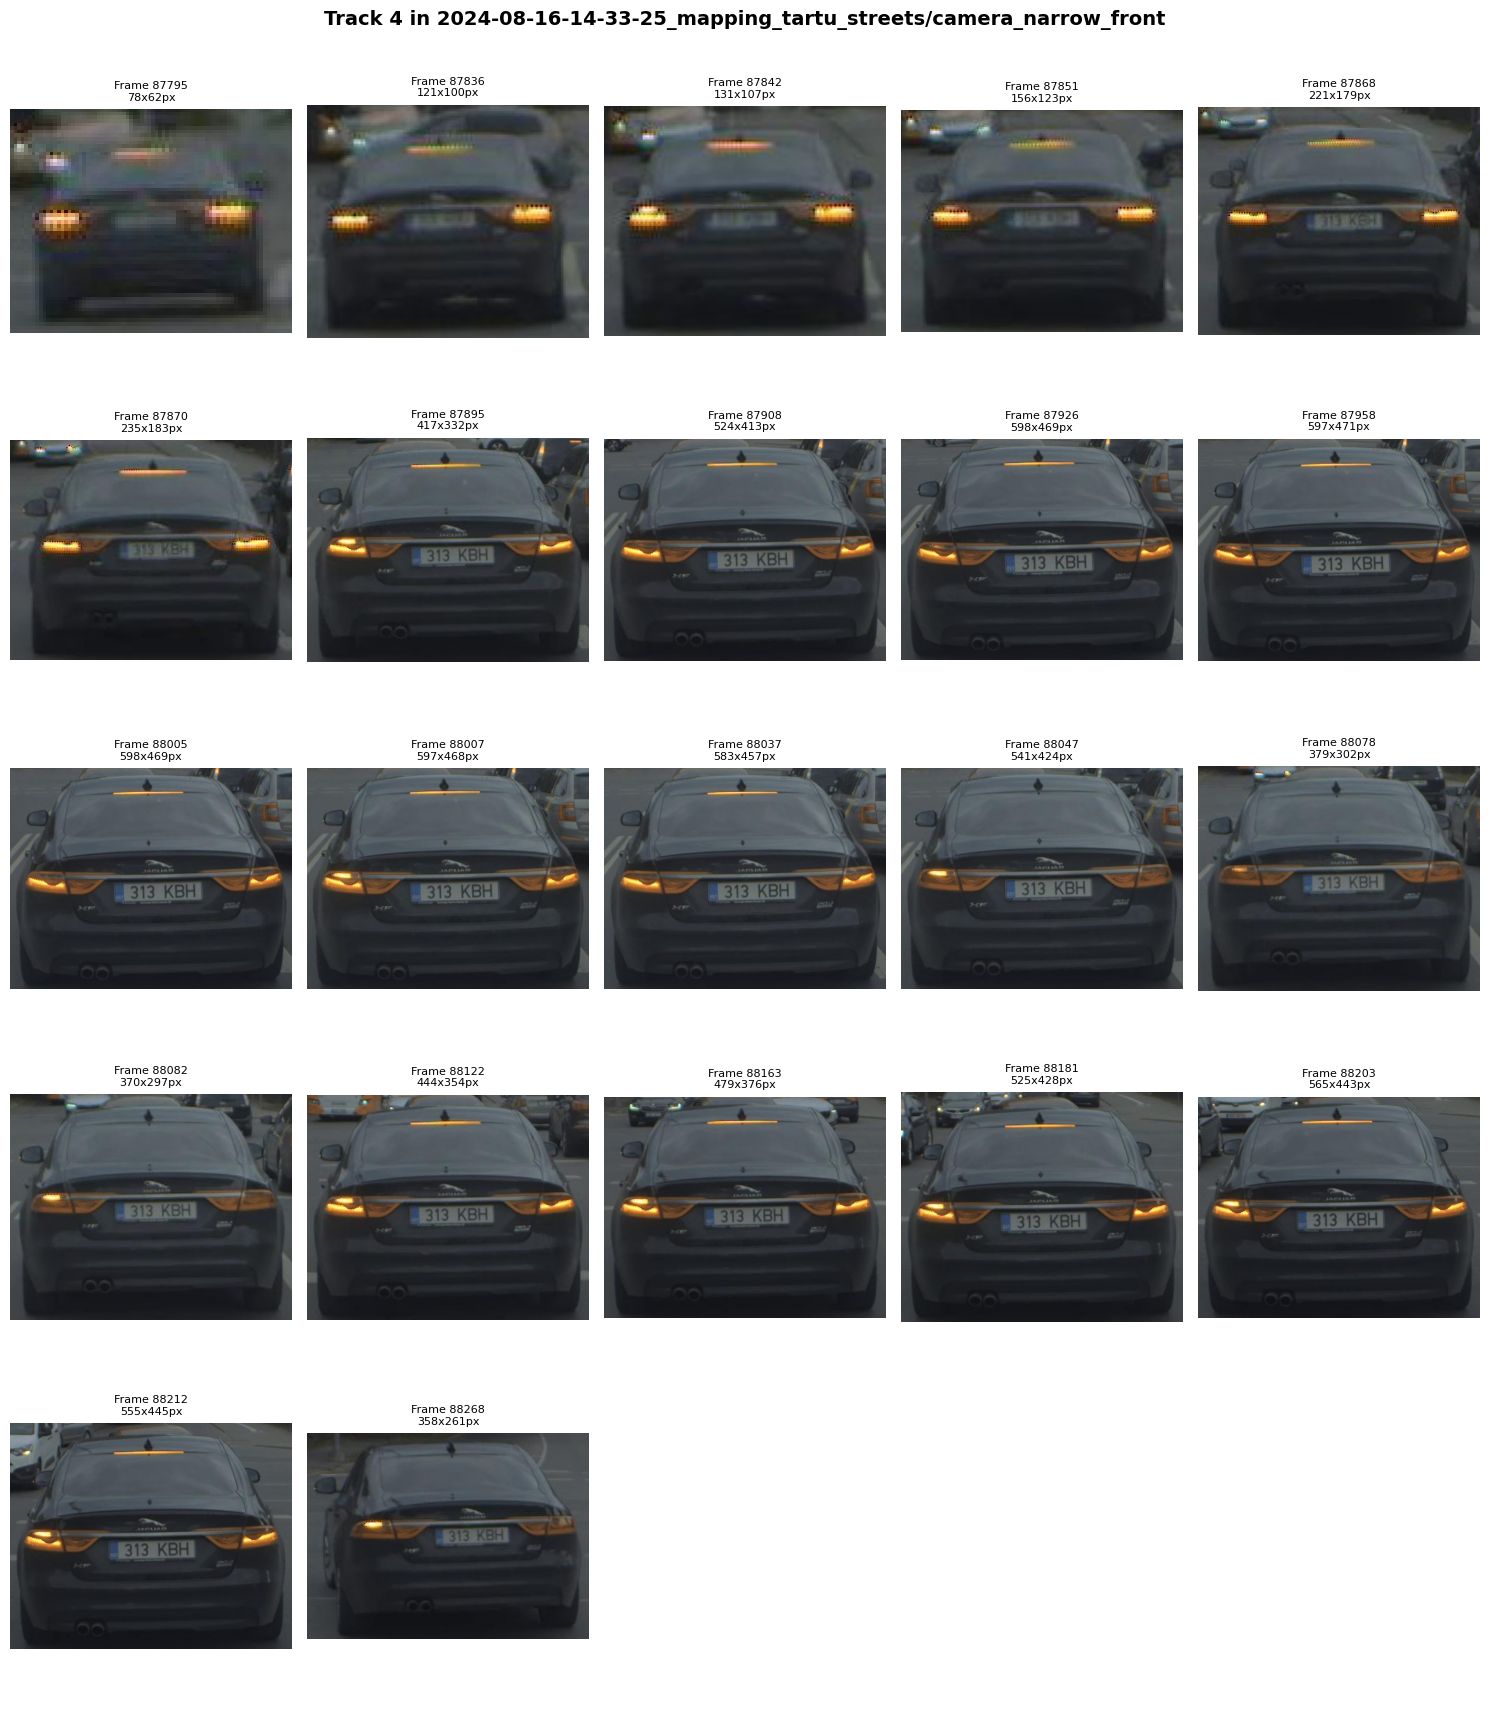

In [9]:
if len(local_tracks) > 0:
    seq, tid = local_tracks.index[30]
    show_track_grid(seq, tid, max_frames=60, cols=5)
    # Blinking seq: 1, 30, 44, 51, 70, 105, 111, 115, 132, 161, 166 
    #[not super clear/short seq: 14, 17, 21, 34, 37, 64, 65, 78->1, 92, 98-> dup, 146, 162]

In [107]:
rows = df[(df["sequence"] == seq) & (df["track_id"] == tid)]['crop_path']
with pd.option_context('display.max_colwidth', None):
    print(rows.to_string())

1059850    /gpfs/space/projects/ml2024/2024-09-05-14-18-54_mapping_tartu_streets_traffic_lights_ouster_lidar_2/camera_wide_front/predict/crops/car/0055922.jpg
1059851    /gpfs/space/projects/ml2024/2024-09-05-14-18-54_mapping_tartu_streets_traffic_lights_ouster_lidar_2/camera_wide_front/predict/crops/car/0055932.jpg
1059852    /gpfs/space/projects/ml2024/2024-09-05-14-18-54_mapping_tartu_streets_traffic_lights_ouster_lidar_2/camera_wide_front/predict/crops/car/0055942.jpg
1059853    /gpfs/space/projects/ml2024/2024-09-05-14-18-54_mapping_tartu_streets_traffic_lights_ouster_lidar_2/camera_wide_front/predict/crops/car/0055952.jpg
1059854    /gpfs/space/projects/ml2024/2024-09-05-14-18-54_mapping_tartu_streets_traffic_lights_ouster_lidar_2/camera_wide_front/predict/crops/car/0055962.jpg
1059855    /gpfs/space/projects/ml2024/2024-09-05-14-18-54_mapping_tartu_streets_traffic_lights_ouster_lidar_2/camera_wide_front/predict/crops/car/0055972.jpg
1059856    /gpfs/space/projects/ml2024/2024-09

### Animation

In [64]:
def animate_track(sequence, track_id, delay=0.3, figsize=(10, 8)):
    track_df = df[(df["sequence"] == sequence) & 
                  (df["track_id"] == track_id) & 
                  (df["exists_locally"])].copy()
    track_df = track_df.sort_values("frame_id_int")
    
    if len(track_df) == 0:
        print(f"No local images found for sequence={sequence}, track_id={track_id}")
        return
    
    print(f"Animating Track {track_id} from {sequence}")
    print(f"Total frames: {len(track_df)}")
    print(f"Frame range: {track_df['frame_id_int'].min()} - {track_df['frame_id_int'].max()}")
    print("Press Ctrl+C to stop\n")
    
    fig, ax = plt.subplots(figsize=figsize)
    
    try:
        for idx, row in track_df.iterrows():
            img = Image.open(row["local_path"])
            
            ax.clear()
            ax.imshow(img)
            ax.set_title(f"Track {track_id} | Frame {row['frame_id']} | Score: {row['score']:.3f}", 
                        fontsize=14, fontweight='bold')
            ax.axis('off')
            
            display(fig)
            clear_output(wait=True)
            time.sleep(delay)
    except KeyboardInterrupt:
        print("\nAnimation stopped")
    finally:
        plt.close(fig)

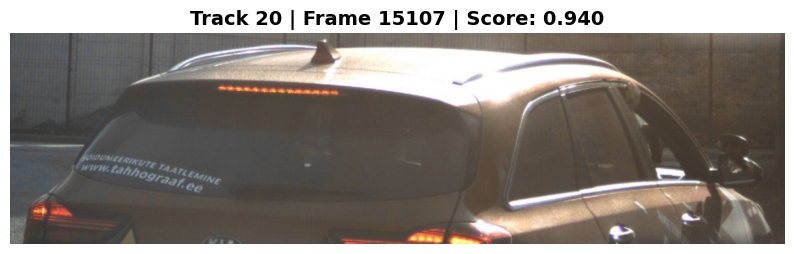

In [57]:
animate_track(seq, tid, delay=0.3)

### gif

In [ ]:
def create_gif(sequence, track_id, output_path="track_animation.gif", duration=200, max_frames=None):
    track_df = df[(df["sequence"] == sequence) & 
                  (df["track_id"] == track_id) & 
                  (df["exists_locally"])].copy()
    track_df = track_df.sort_values("frame_id_int")
    
    if max_frames:
        track_df = track_df.head(max_frames)
    
    if len(track_df) == 0:
        print(f"No local images found")
        return
    
    images = []
    for _, row in track_df.iterrows():
        img = Image.open(row["local_path"])
        # Add frame info to image
        from PIL import ImageDraw, ImageFont
        img_with_text = img.copy()
        draw = ImageDraw.Draw(img_with_text)
        text = f"Frame {row['frame_id']} | Score: {row['score']:.3f}"
        # Use default font
        draw.text((10, 10), text, fill='white')
        draw.text((10, 10), text, fill='black')  # Shadow effect
        images.append(img_with_text)
    
    # Save as GIF
    images[0].save(
        output_path,
        save_all=True,
        append_images=images[1:],
        duration=duration,
        loop=0
    )
    print(f"GIF saved to: {output_path}")
    print(f"Frames: {len(images)}, Duration: {duration}ms per frame")
    
    # Display in notebook
    return HTML(f'<img src="{output_path}">')

In [22]:
# Example 3: Create GIF (uncomment to use)
# create_gif(seq, tid, output_path="my_track.gif", duration=300, max_frames=20)